# Task 3 : Diabetes Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = None
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Inferences from summary statistics :

**Glucose** : The mean glucose level of the participants is approximately 120.9 mg/dL. Glucose is a crucial feature for predicting diabetes as it represents the blood sugar level, which is directly related to diabetes development. Higher glucose levels are commonly associated with diabetes, so this feature is likely to have a significant impact on the prediction model.


**BMI (Body Mass Index)** : The mean BMI of the participants is around 32.0. BMI is a measure of body fat and is known to be a critical risk factor for diabetes. Higher BMI values are associated with increased insulin resistance and a higher likelihood of developing diabetes. Therefore, this feature is expected to have a substantial impact on the prediction model.


**Age** : The mean age of the participants is approximately 33.2 years. Age is an essential factor in diabetes prediction because the risk of diabetes generally increases with age. Older individuals are more likely to develop diabetes due to various physiological changes and lifestyle factors. The age feature is likely to be highly impactful in predicting diabetes.


**Diabetes Pedigree Function** : The mean value of the diabetes pedigree function is 0.4719. This function provides information about the diabetes history in family members and helps assess the genetic predisposition to diabetes. A higher pedigree function value indicates a stronger family history of diabetes, which can significantly influence the likelihood of diabetes development in an individual.

In [5]:
# null values
df.isnull().sum()  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

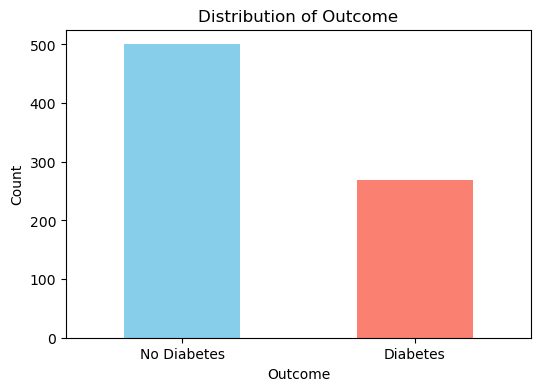

In [6]:
# Bar plot for the 'Outcome' column
plt.figure(figsize=(6, 4))
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
plt.show()

we definitely have to handle this class imbalance before getting into the modelling part

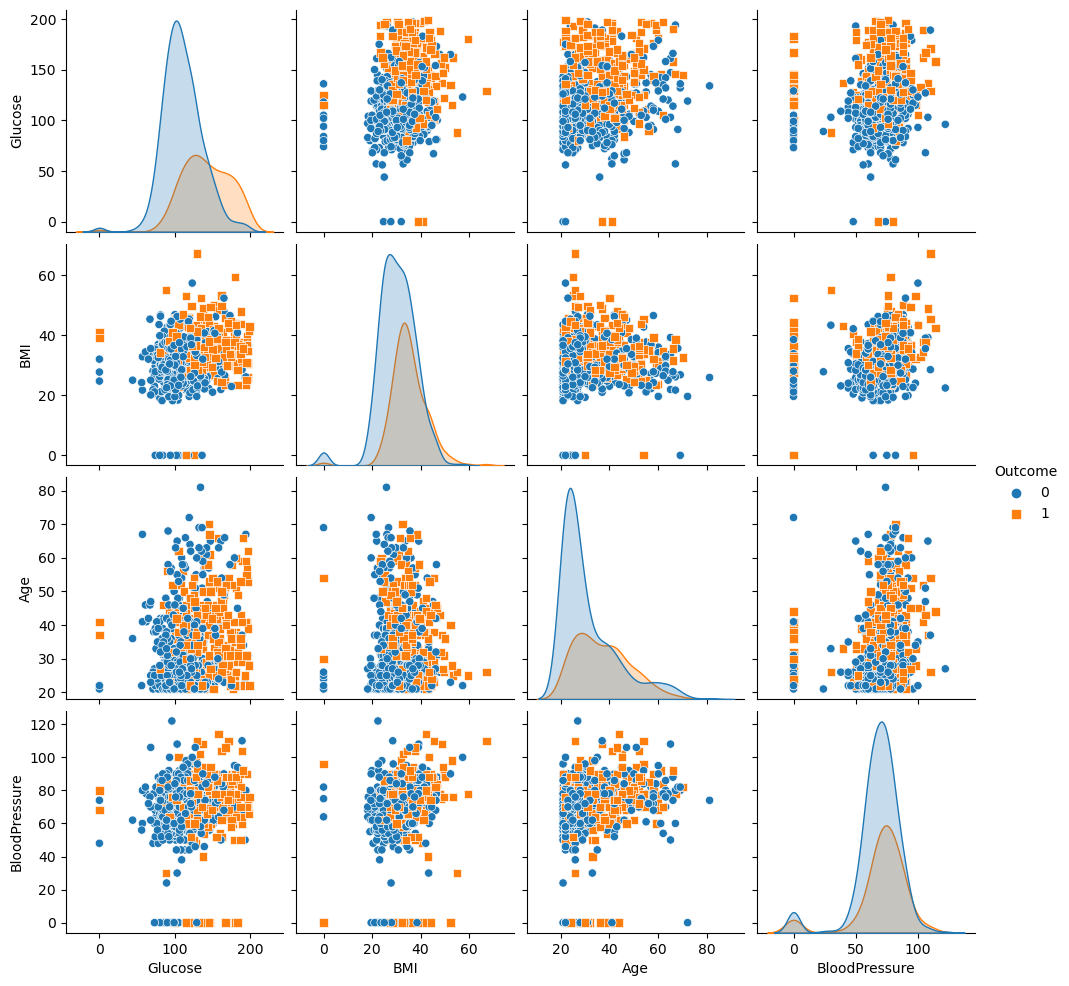

In [7]:
# Box plot for numeric features
cols_for_pairplot = ['Glucose', 'BMI', 'Age', 'BloodPressure']


# Separate the target variable 'Outcome' from the features
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Pairplot for some numeric columns
cols_for_pairplot = ['Glucose', 'BMI', 'Age', 'BloodPressure']
sns.pairplot(pd.concat([X[cols_for_pairplot], y], axis=1), hue='Outcome', markers=['o', 's'], diag_kind='kde')
plt.show()


<Figure size 1200x600 with 0 Axes>

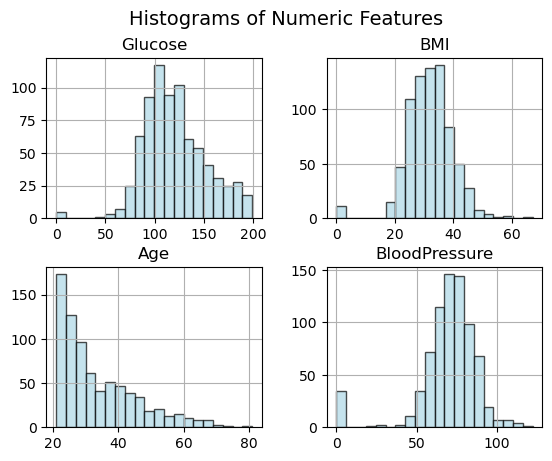

In [8]:
# Histograms for numeric features
plt.figure(figsize=(12, 6))
df[cols_for_pairplot].hist(bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.suptitle('Histograms of Numeric Features', fontsize=14)
plt.show()

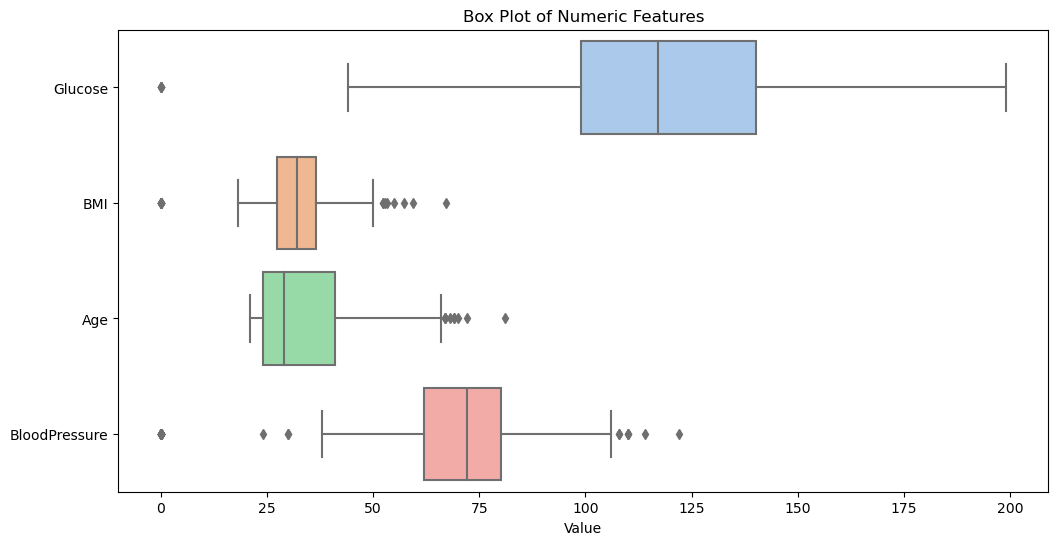

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols_for_pairplot], orient='h', palette='pastel')
plt.title('Box Plot of Numeric Features')
plt.xlabel('Value')
plt.show()

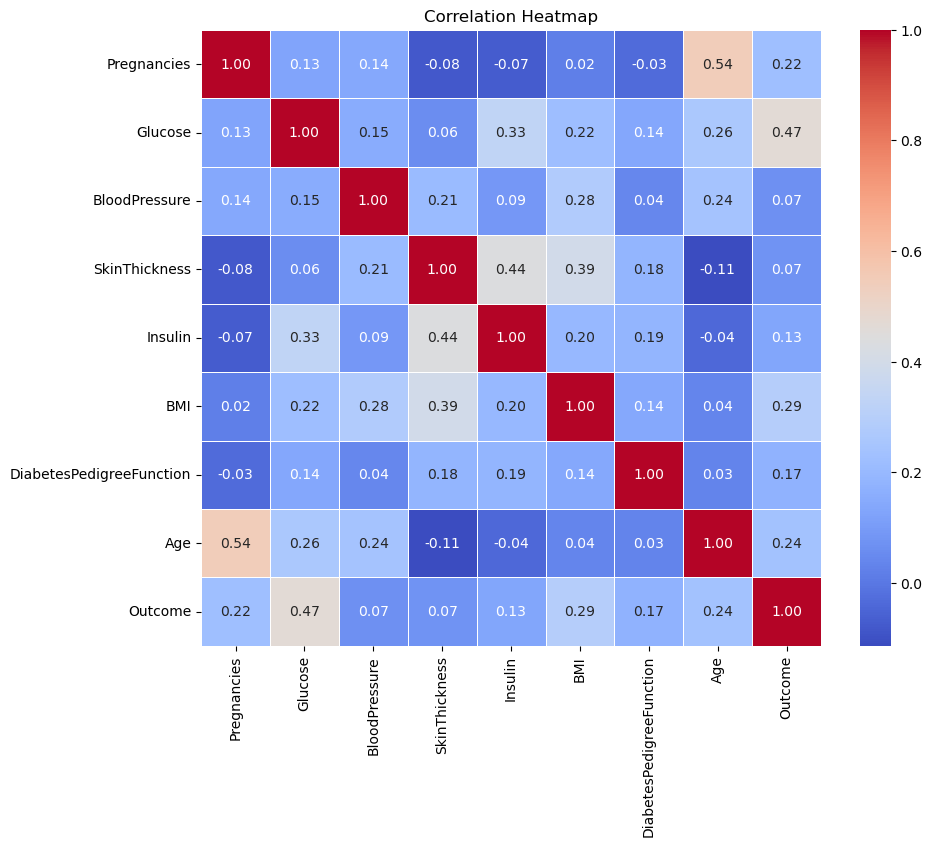

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the oversampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply oversampling on the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print(pd.Series(y_train_resampled).value_counts())


0    401
1    401
Name: Outcome, dtype: int64


# Choosing the Best Model for the Diabetes classification task :

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'DecisionTreeClassifier': {'max_depth': [None, 5, 10, 20]},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 20]},
    'GradientBoostingClassifier': {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Function to perform hyperparameter tuning
def hyperparameter_tuning(classifier, params):
    grid_search = GridSearchCV(classifier, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    return best_params, best_model

# Train and evaluate each classifier with hyperparameter tuning
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC()
}

for clf_name, clf in classifiers.items():
    best_params, best_model = hyperparameter_tuning(clf, param_grid[clf_name])
    
    # Evaluate the best model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    
    print(f"{clf_name} (Best Parameters: {best_params}) results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")
    print(f"Confusion matrix:\n {cm}\n=======================================================================\n")

LogisticRegression (Best Parameters: {'C': 1}) results:
Accuracy: 0.7468
Precision: 0.6379
Recall: 0.6727
F1 Score: 0.6549

Confusion matrix:
 [[78 21]
 [18 37]]

DecisionTreeClassifier (Best Parameters: {'max_depth': 5}) results:
Accuracy: 0.7922
Precision: 0.7447
Recall: 0.6364
F1 Score: 0.6863

Confusion matrix:
 [[87 12]
 [20 35]]

RandomForestClassifier (Best Parameters: {'max_depth': 10, 'n_estimators': 200}) results:
Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607

Confusion matrix:
 [[79 20]
 [18 37]]

GradientBoostingClassifier (Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}) results:
Accuracy: 0.7662
Precision: 0.6610
Recall: 0.7091
F1 Score: 0.6842

Confusion matrix:
 [[79 20]
 [16 39]]

KNeighborsClassifier (Best Parameters: {'n_neighbors': 7}) results:
Accuracy: 0.6883
Precision: 0.5574
Recall: 0.6182
F1 Score: 0.5862

Confusion matrix:
 [[72 27]
 [21 34]]

SVC (Best Parameters: {'C': 0.1, 'kernel': 'linear'}) results:
Accuracy: 0.7532
Preci

In [13]:
from xgboost import XGBClassifier

# Define the XGBoost classifier with hyperparameters
xgb_clf = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=42
)

# Train the classifier on the training data
xgb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_clf.predict(X_test)

# Evaluate the performance of XGBoost
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print("XGBoost results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion matrix:\n {cm}\n=======================================================================\n")

XGBoost results:
Accuracy: 0.7338
Precision: 0.6129
Recall: 0.6909
F1 Score: 0.6496
Confusion matrix:
 [[75 24]
 [17 38]]



In [17]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall, AUC

# Standardize the features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Sequential Neural Network
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=[BinaryAccuracy(), Precision(), Recall(), AUC()])

# Train the model
batch_size = 32
epochs = 50
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Evaluate the model on the test set
eval_metrics = model.evaluate(X_test, y_test, verbose=0)
loss, accuracy, precision, recall, auc = eval_metrics

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test AUC: {auc:.4f}")

Epoch 1/50
20/20 [==============================] - 1s 2ms/step - loss: 0.7440 - binary_accuracy: 0.3811 - precision_2: 0.2831 - recall_2: 0.5117 - auc_2: 0.4052
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.7099 - binary_accuracy: 0.5407 - precision_2: 0.3772 - recall_2: 0.4977 - auc_2: 0.4854
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6833 - binary_accuracy: 0.6336 - precision_2: 0.4700 - recall_2: 0.4413 - auc_2: 0.5540
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6987 - precision_2: 0.5946 - recall_2: 0.4131 - auc_2: 0.6087
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6356 - binary_accuracy: 0.7150 - precision_2: 0.6418 - recall_2: 0.4038 - auc_2: 0.6812
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6096 - binary_accuracy: 0.7248 - precision_2: 0.6774 - recall_2: 0.3944 - auc_2: 0.7447
Epoch 7/50
20/20 [==========

## Inferences from the Outputs :

* The DecisionTreeClassifier achieved the highest accuracy (0.7922) among all the models, closely followed by LogisticRegression (accuracy: 0.7468) and RandomForestClassifier (accuracy: 0.7532). These models outperformed the others in terms of overall correct predictions on the test set.

* The GradientBoostingClassifier achieved the highest recall (0.7091) among all the models. This means it is better at identifying true positive cases (correctly predicting actual positive instances). This model could be useful in applications where minimizing false negatives is crucial, such as in medical diagnoses.

* The DecisionTreeClassifier had the highest precision (0.7447), indicating its ability to make accurate positive predictions. This means that when it predicts a positive case, it is more likely to be correct. However, it had a slightly lower recall compared to the GradientBoostingClassifier, implying that it may miss some positive cases.

* The KNeighborsClassifier had the lowest performance among the models, with an accuracy of 0.6883 and relatively lower precision, recall, and F1 score. This suggests that the K-nearest neighbors approach may not be the best choice for this particular diabetes prediction task.

* The XGBoost model achieved a relatively balanced performance across accuracy, precision, recall, and F1 score (accuracy: 0.7338, precision: 0.6129, recall: 0.6909, F1 score: 0.6496). While it didn't outperform the top models in any specific metric, its balanced performance makes it a reasonable choice for a wide range of applications.